<a href="https://colab.research.google.com/github/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/blob/main/q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loaad .py module
!wget https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py
!wget https://github.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset
!wget https://github.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/raw/refs/heads/main/knn_best_model.pkl
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deep-1402/refs/heads/master/images/persian-digits.jpg

--2024-09-26 05:55:22--  https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1092 (1.1K) [text/plain]
Saving to: ‘data_hoda.py’

data_hoda.py        100%[===================>]   1.07K  --.-KB/s    in 0s      

2024-09-26 05:55:23 (40.4 MB/s) - ‘data_hoda.py’ saved [1092/1092]

--2024-09-26 05:55:23--  https://github.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Mary

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import cv2
import pickle

from data_hoda import knn_classifier,load_hoda

In [3]:
with open('knn_best_model.pkl','rb') as file:
  knn=pickle.load(file)

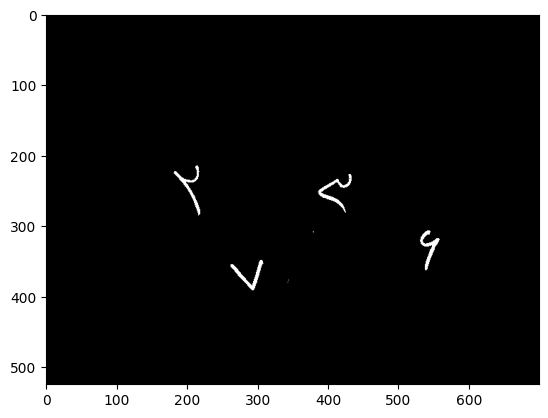

In [22]:
image = cv2.imread('persian-digits.jpg') #load BGR image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to gray-scale
_, im = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

plt.imshow(im,cmap='gray')

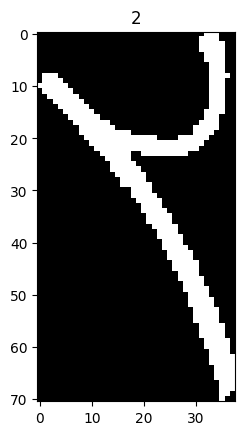

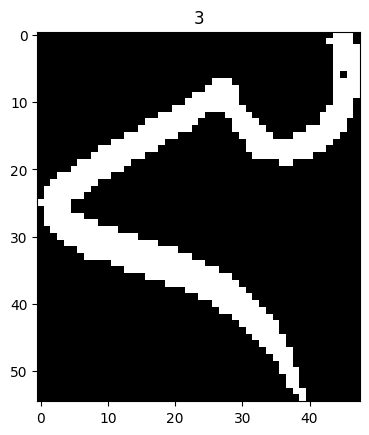

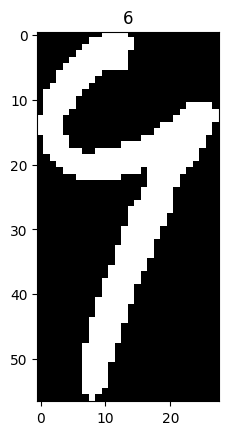

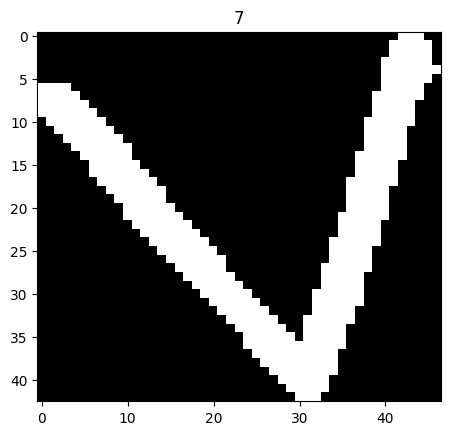

In [23]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(im, connectivity=8)
# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    if w>5 and h>5:
      # Crop the connected component using the bounding box
      connected_component = im[y:y+h, x:x+w]
      resized = cv2.resize(connected_component, (15,15))
      flatten = resized.reshape(1,-1)
      r = knn.predict(flatten)[0]

      plt.figure()
      plt.imshow(connected_component, cmap='gray')
      plt.title(r);

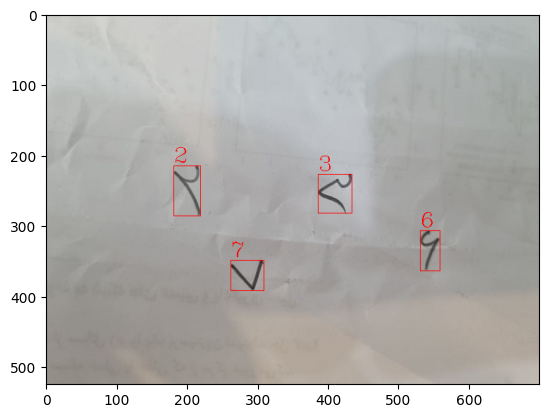

In [25]:
image = cv2.imread('persian-digits.jpg') #load BGR image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to gray-scale
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Use connectedComponentsWithStats to obtain labels and bounding boxes
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    if w>5 and h>5:
      # Crop the connected component using the bounding box
      connected_component = binary[y:y+h, x:x+w]
      resized = cv2.resize(connected_component, (15,15))
      flatten = resized.reshape(1,-1)
      r = knn.predict(flatten)[0]
      cv2.rectangle(image,(x, y),(x+w,y+h),(0,0,255), 1)
      cv2.putText(image, str(r),  (x, y-5), cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255))

plt.imshow(image[:,:,::-1]) #bgr to rgb

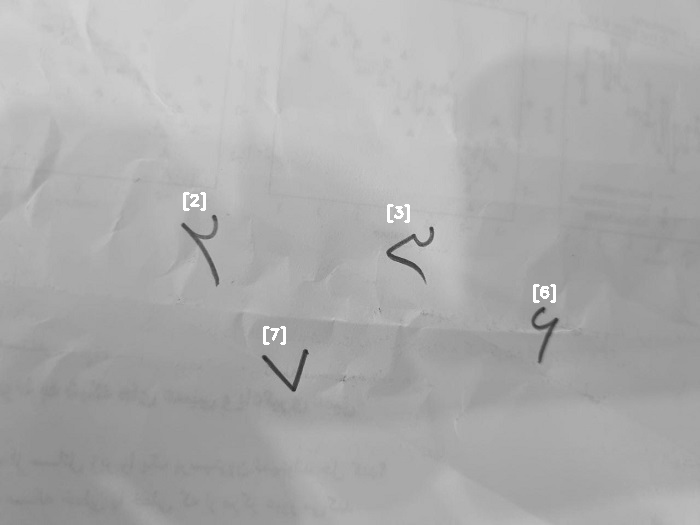

In [ ]:
#ghablan_idea

for label in range(1, num_labels):
    x, y, w, h = stats[label][:4]
    connected_component = binary_image[y:y+h, x:x+w]

    #resize
    rcomponent = cv2.resize(connected_component, (20, 20))

    #reshape
    rc=np.reshape(rcomponent,[20**2])
    rc= rc.astype(dtype='uint8')

#rc.dtype
    #predict:
    prediction = model.predict([rc])
    cv2.putText(image, str(prediction), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

cv2_imshow(image)